# S&P 500 내에 있는 각 섹터 분석

## 1. 이동평균선을 이용한 분석

위키피디아에 있는 S&P 500 관련 정보가 있는 표를 들고옵니다.

In [13]:
import pandas as pd
import yfinance as yf


url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tbl = pd.read_html(url)

S_P_data= tbl[0]
S_P_data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


위의 표 중 Symbol(티커) 항목과 GICS Sector 항목만 다시 들고옵니다.

In [14]:
S_P_data_symbol_sector = S_P_data[['Symbol', 'GICS Sector']]
S_P_data_symbol_sector.columns = ['Ticker', 'Sector']
S_P_data_symbol_sector_sorted = S_P_data_symbol_sector.sort_values(by='Ticker', ascending=True)
S_P_data_symbol_sector_sorted

,Ticker,Sector
9,A,Health Care
39,AAPL,Information Technology
3,ABBV,Health Care
11,ABNB,Consumer Discretionary
2,ABT,Health Care
...,...,...
498,XYL,Industrials
499,YUM,Consumer Discretionary
501,ZBH,Health Care
500,ZBRA,Information Technology


Yahoo Finance에서 제공하는 데이터 중 우리가 보유한 Ticker에 해당하는 종가 데이터만 추출합니다. (2020-01-01부터 2025-02-18까지)

In [15]:
# # 주가 데이터 다운로드
# data_raw = yf.download(S_P_data_symbol_sector['Ticker'].tolist(), start='2020-01-01',end='2025-02-18', auto_adjust=True)['Close']   # 종가 데이터만 뽑기

In [16]:
import pickle

# with open('S&P500_raw_data.pkl', 'wb') as f:
#     pickle.dump(data_raw, f)

In [17]:
# 데이터 불러오기
with open('S&P500_raw_data.pkl', 'rb') as f:
    data_raw = pickle.load(f)

In [18]:
data_raw        # 데이터 추출본

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,83.061348,72.716049,71.589783,NaN,79.273941,41.268997,195.263611,334.429993,109.912361,40.313675,...,190.670792,24.381453,139.762283,53.556572,55.137985,75.240532,93.090332,139.312653,259.140015,128.819427
2020-01-03,81.727722,72.009132,70.910248,NaN,78.307518,41.221451,194.938370,331.809998,107.977524,40.234997,...,190.717453,24.422932,137.689224,53.814129,54.694702,75.683388,92.798775,138.948517,256.049988,128.838638
2020-01-06,81.969315,72.582916,71.469864,NaN,78.717804,41.383106,193.665421,333.709991,106.708916,39.920238,...,190.950790,24.373158,137.416656,53.736855,55.114651,75.193413,92.744087,138.145508,258.010010,127.849503
2020-01-07,82.220589,72.241562,71.062149,NaN,78.280174,41.040779,189.484177,333.390015,109.136597,39.439381,...,190.558792,24.215540,138.068787,53.625252,54.663582,74.910744,92.908089,138.024078,256.470001,128.281647
2020-01-08,83.032379,73.403648,71.565796,NaN,78.599274,40.631893,189.855850,337.869995,110.122284,39.002239,...,190.773483,24.306786,138.934998,53.573727,53.839241,75.165131,93.072113,139.676849,247.639999,128.003159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10,143.690002,227.649994,190.339996,135.240005,131.309998,91.459999,386.890015,451.100006,204.860001,46.090000,...,325.179993,30.120001,78.970001,66.879997,109.986206,131.259995,148.149994,100.419998,358.440002,171.910004
2025-02-11,141.750000,232.619995,191.830002,134.520004,131.440002,89.599998,390.010010,458.820007,203.460007,46.439999,...,319.230011,30.000000,77.000000,67.190002,110.680000,132.039993,146.649994,98.980003,354.399994,174.289993
2025-02-12,138.080002,236.869995,193.000000,140.520004,130.490005,88.260002,388.829987,462.760010,205.130005,45.220001,...,318.959991,29.590000,78.370003,67.400002,107.349998,129.910004,146.509995,98.989998,352.920013,173.880005


이후 사용에 용이하도록 섹터를 열 이름에 추가합니다.

In [19]:
data_tuple_columns = [(x, y) for x, y in zip(data_raw.columns, S_P_data_symbol_sector['Sector'].tolist())]      # ticker와 sector가 튜플로 구성되어 있는 열의 이름들 생성
data_tuple = data_raw.copy()
data_tuple.columns = data_tuple_columns

In [20]:
data_tuple # 종가 데이터

,"(A, Industrials)","(AAPL, Industrials)","(ABBV, Health Care)","(ABNB, Health Care)","(ABT, Information Technology)","(ACGL, Information Technology)","(ACN, Information Technology)","(ADBE, Utilities)","(ADI, Financials)","(ADM, Health Care)",...,"(WTW, Energy)","(WY, Financials)","(WYNN, Information Technology)","(XEL, Consumer Discretionary)","(XOM, Utilities)","(XYL, Industrials)","(YUM, Consumer Discretionary)","(ZBH, Information Technology)","(ZBRA, Health Care)","(ZTS, Health Care)"
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,83.061348,72.716049,71.589783,NaN,79.273941,41.268997,195.263611,334.429993,109.912361,40.313675,...,190.670792,24.381453,139.762283,53.556572,55.137985,75.240532,93.090332,139.312653,259.140015,128.819427
2020-01-03,81.727722,72.009132,70.910248,NaN,78.307518,41.221451,194.938370,331.809998,107.977524,40.234997,...,190.717453,24.422932,137.689224,53.814129,54.694702,75.683388,92.798775,138.948517,256.049988,128.838638
2020-01-06,81.969315,72.582916,71.469864,NaN,78.717804,41.383106,193.665421,333.709991,106.708916,39.920238,...,190.950790,24.373158,137.416656,53.736855,55.114651,75.193413,92.744087,138.145508,258.010010,127.849503
2020-01-07,82.220589,72.241562,71.062149,NaN,78.280174,41.040779,189.484177,333.390015,109.136597,39.439381,...,190.558792,24.215540,138.068787,53.625252,54.663582,74.910744,92.908089,138.024078,256.470001,128.281647
2020-01-08,83.032379,73.403648,71.565796,NaN,78.599274,40.631893,189.855850,337.869995,110.122284,39.002239,...,190.773483,24.306786,138.934998,53.573727,53.839241,75.165131,93.072113,139.676849,247.639999,128.003159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10,143.690002,227.649994,190.339996,135.240005,131.309998,91.459999,386.890015,451.100006,204.860001,46.090000,...,325.179993,30.120001,78.970001,66.879997,109.986206,131.259995,148.149994,100.419998,358.440002,171.910004
2025-02-11,141.750000,232.619995,191.830002,134.520004,131.440002,89.599998,390.010010,458.820007,203.460007,46.439999,...,319.230011,30.000000,77.000000,67.190002,110.680000,132.039993,146.649994,98.980003,354.399994,174.289993
2025-02-12,138.080002,236.869995,193.000000,140.520004,130.490005,88.260002,388.829987,462.760010,205.130005,45.220001,...,318.959991,29.590000,78.370003,67.400002,107.349998,129.910004,146.509995,98.989998,352.920013,173.880005


섹터 당 데이터를 분리해 줍니다. (각 섹터끼리 모인 정보를 얻기 위해)

In [21]:
sector_name = S_P_data_symbol_sector_sorted['Sector'].unique().tolist()
data_sector = {}
for sector in sector_name:      # 섹터 별로 데이터 분리하기
    data_sector[f'{sector}'] = data_tuple.loc[:, [columns[1] == f'{sector}' for columns in data_tuple.columns]]

각 섹터별 데이터를 이용해서 섹터 평균 종가와 60일 기준, 200일 기준 지수이동평균을 각각 구한 후 표에 추가합니다.

In [22]:
import pandas_ta as ta

for df in data_sector.values():
    df['average_close'] = df.mean(axis=1)       # 당일 섹터의 평균을 구한다.
    df['EMA_200'] = ta.ema(df['average_close'], length=200)       # 200일 지수 이동평균(최근 데이터를 더욱 고려하는 지수 이동평균 사용)
    df['EMA_60'] = ta.ema(df['average_close'], length=60)       # 60일 지수 이동평균(최근 데이터를 더욱 고려하는 지수 이동평균 사용)

ModuleNotFoundError: No module named 'pandas_ta'

위에서 구한 데이터를 이용하여 그래프를 그립니다.

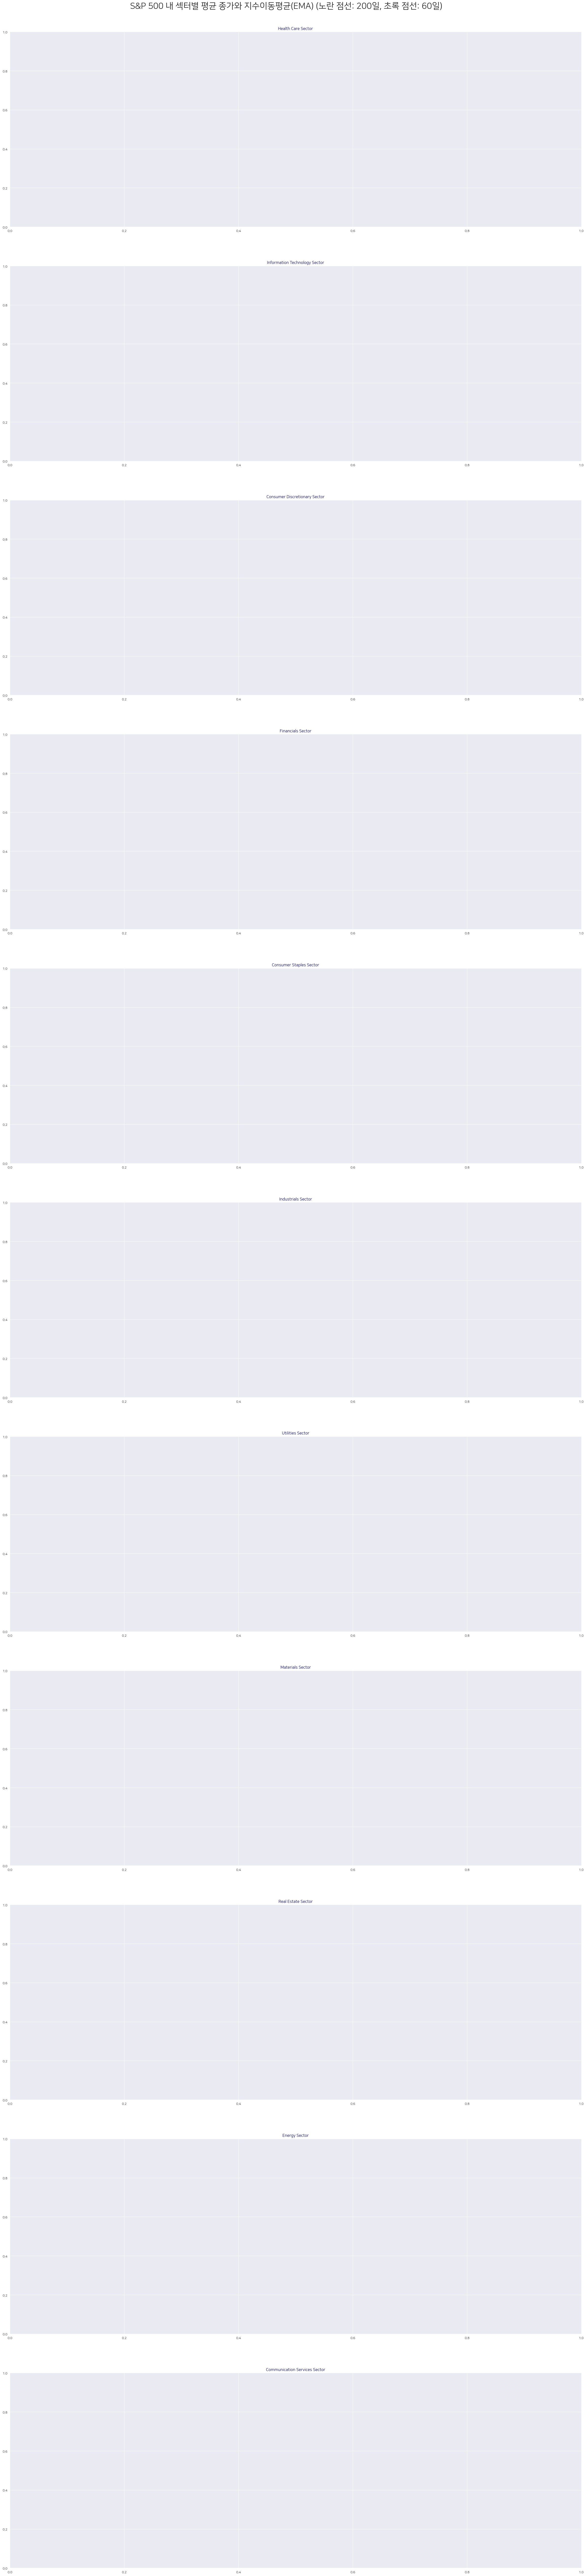

In [ ]:
# 지수이동평균을 그래프로...

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumSquare')

fig, axes = plt.subplots(11, 1, figsize=(30, 120))

# 그래프 표현
for sector, ax in zip(data_sector.keys(), axes.flat):
    sns.lineplot(data=data_sector[f'{sector}'][['average_close', 'EMA_200', 'EMA_60']], ax=ax)
    ax.set_title(f'{sector} Sector',
                 fontsize=12,
                 color='navy')
fig.suptitle('S&P 500 내 섹터별 평균 종가와 지수이동평균(EMA) (노란 점선: 200일, 초록 점선: 60일)',
             fontsize=25,)
fig.subplots_adjust(top=0.97)
plt.show()

---

## 2. 상대강도지수(RSI)를 이용한 분석

상대강도지수를 확인하여 현재 상황이 상대적으로 과매수상태인지, 과매도상태인지 확인합니다.

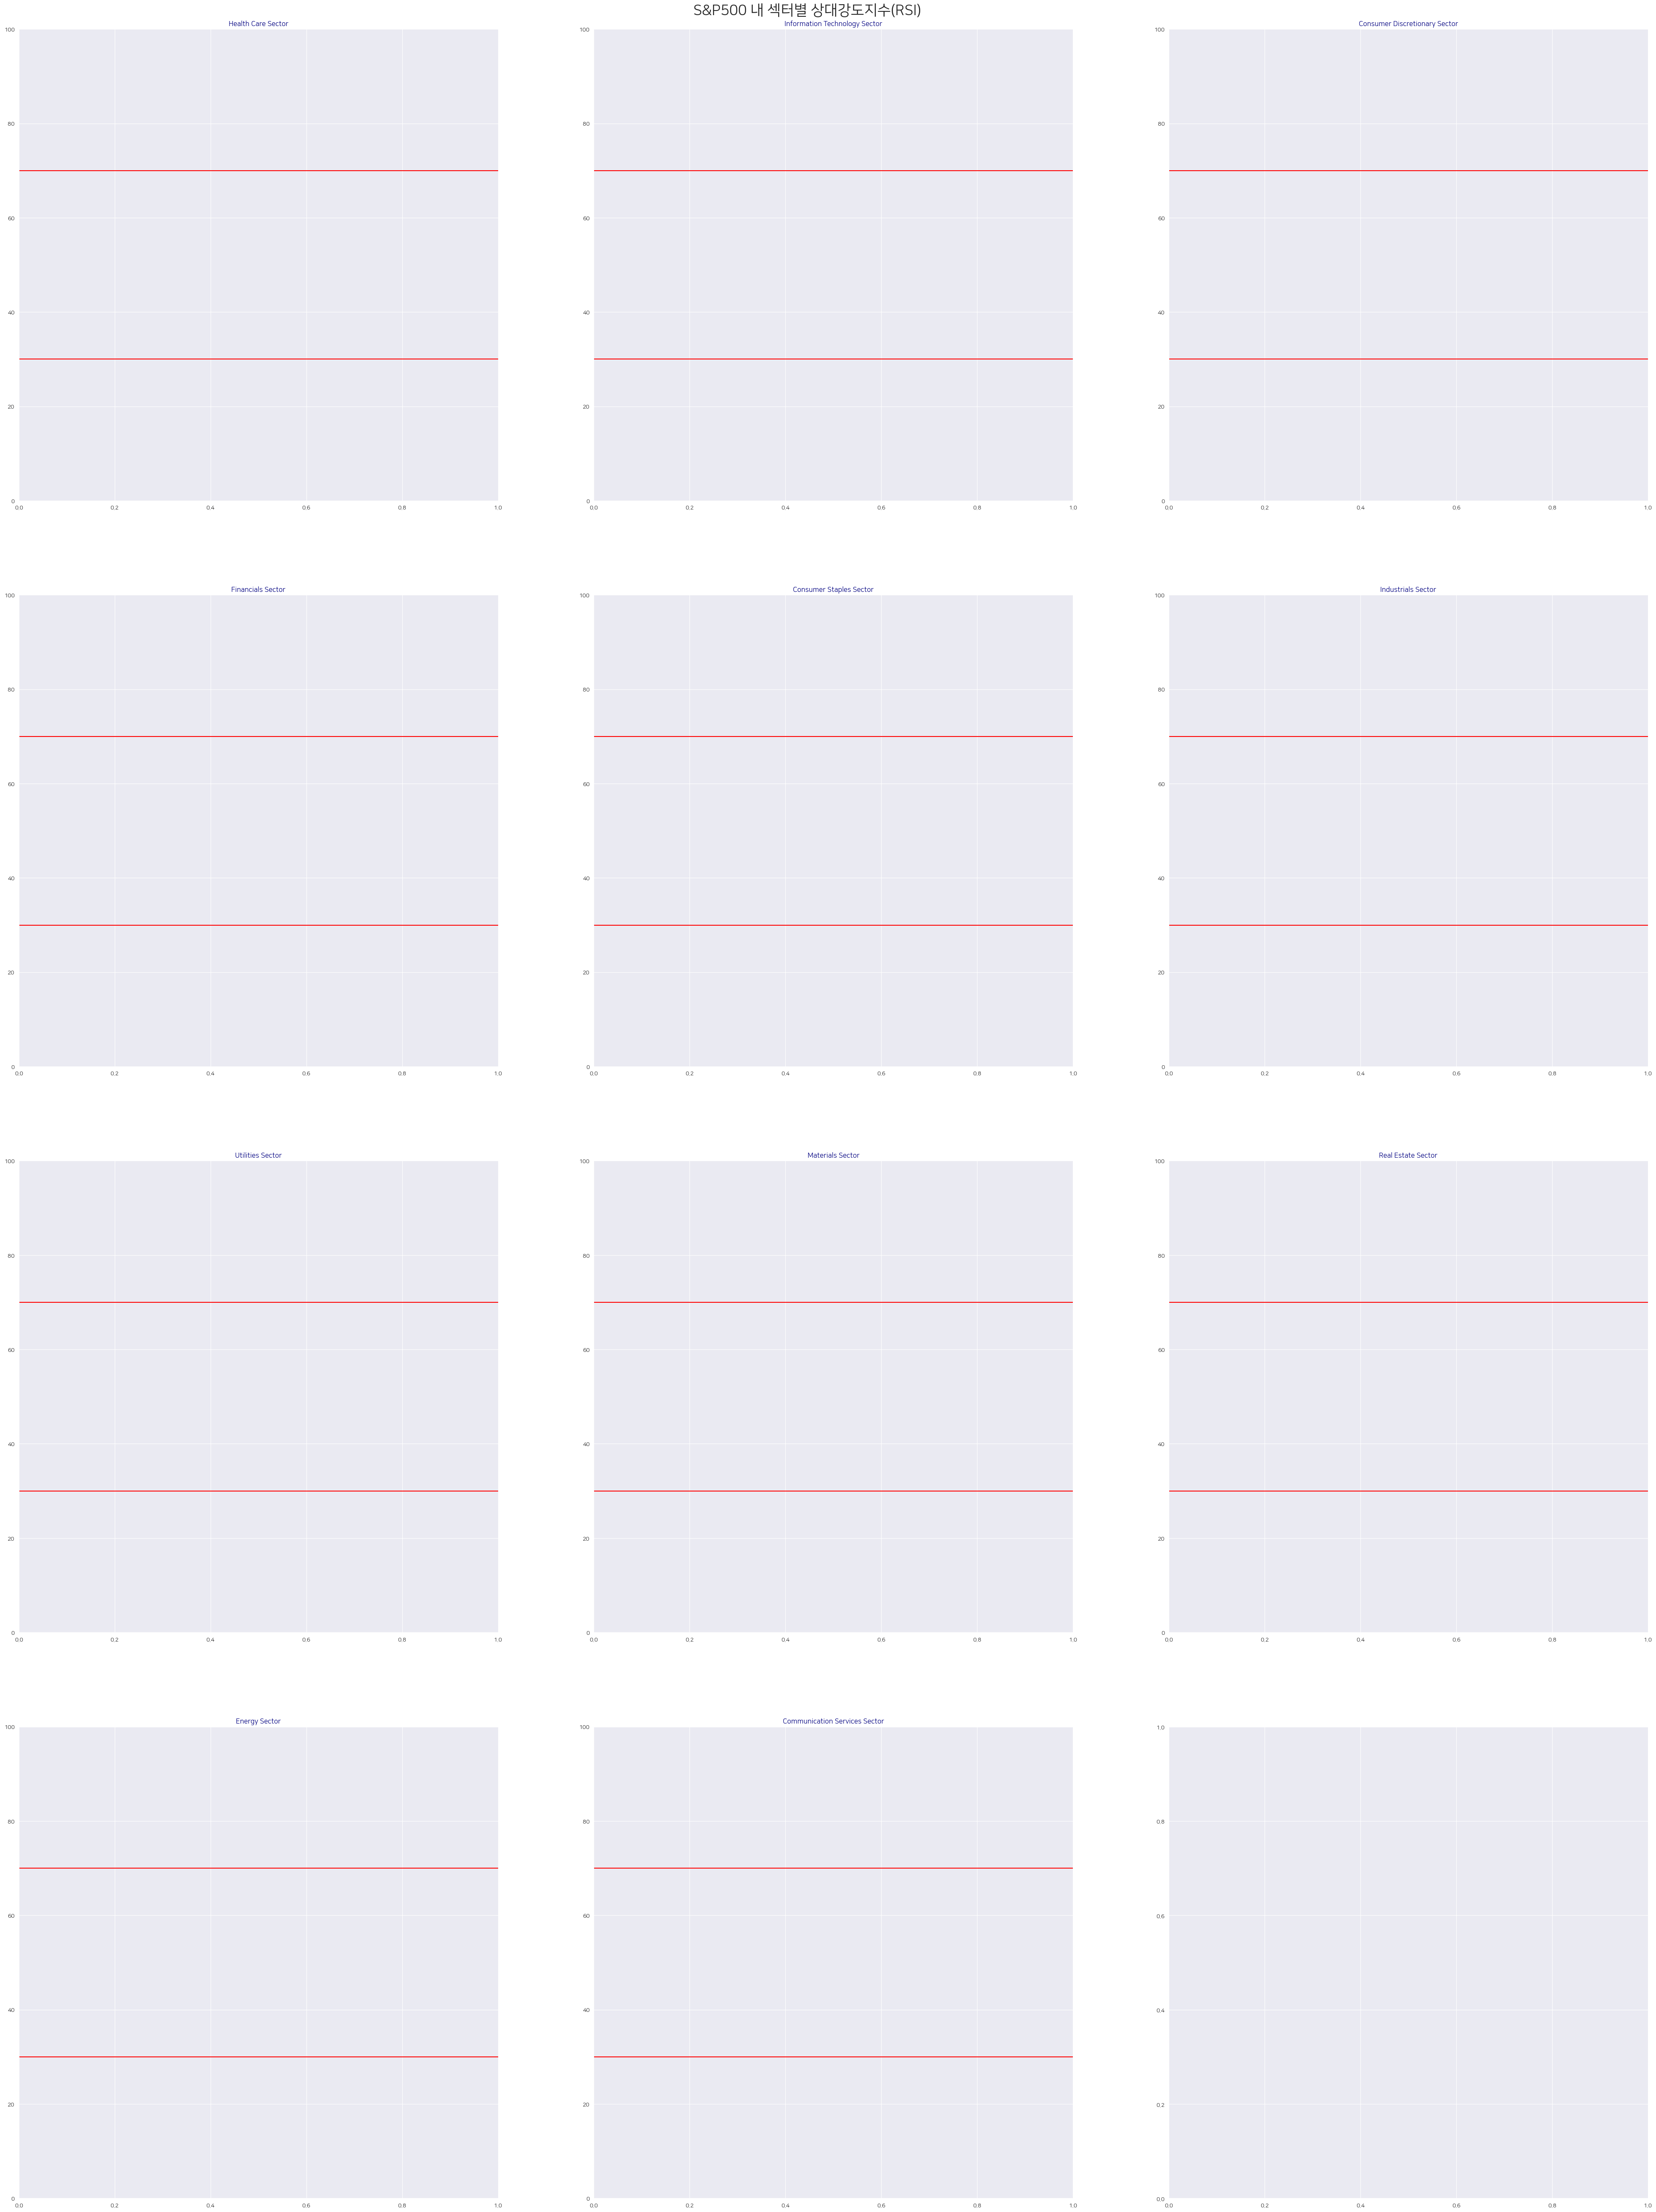

In [ ]:
for df in data_sector.values():
    df['RSI_14'] = ta.rsi(df['average_close'], length=14)                   # 14일 간의 RSI 계산
    df.loc[:, 'RSI_14'] = df['RSI_14'].fillna(0)                            # NaN을 0으로 채워줌

# 그래프 표현
fig, axes = plt.subplots(4, 3, figsize=(50, 60))

for sector, ax in zip(data_sector.keys(), axes.flat):

    sns.lineplot(data=data_sector[f'{sector}']['RSI_14'], ax=ax)

    ax.axhline(y=70, color='r', linestyle='-')
    ax.axhline(y=30, color='r', linestyle='-')
    ax.set_ylim([0, 100])
    ax.set_title(f'{sector} Sector',
                 fontsize=12,
                 color='navy')

fig.suptitle('S&P500 내 섹터별 상대강도지수(RSI)',
             fontsize=25,)
fig.subplots_adjust(top=0.97)
plt.show()

---

## 3. 볼린저 밴드를 이용한 분석

볼린저 밴드를 이용하여 현재 상황이 상대적으로 과매수상태인지, 과매도상태인지 확인합니다.

In [ ]:
data_sector.keys()

dict_keys(['Health Care', 'Information Technology', 'Consumer Discretionary', 'Financials', 'Consumer Staples', 'Industrials', 'Utilities', 'Materials', 'Real Estate', 'Energy', 'Communication Services'])

KeyError: "['Lower Band', 'Mid Band', 'Upper Band'] not in index"

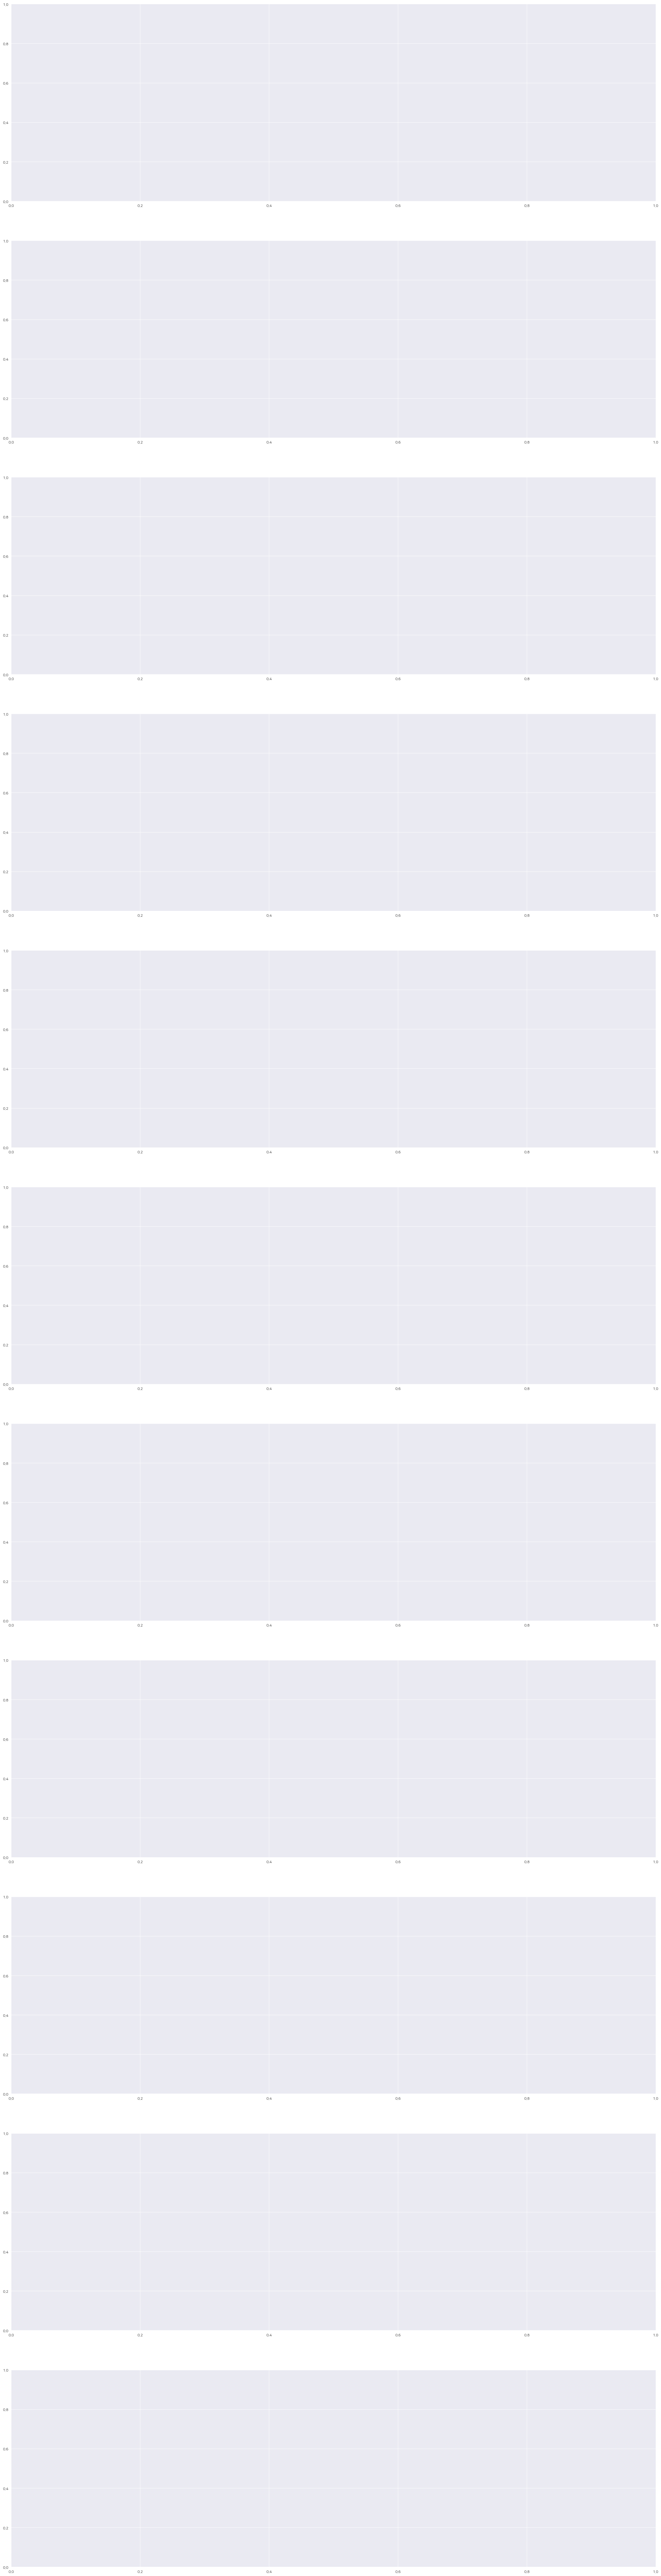

In [ ]:
import pandas as pd

for df in data_sector.values():
    band = ta.bbands(df['average_close'], length=20, std=2)     # length: 이동평균에 계산되는 최근 일수, # std: 상단과 하단 밴드를 몇 표준편차 기준으로 계산할지 의미

    df = pd.concat([df, band], axis=1)

# 그래프 표시
plt.rc('font', family='NanumSquare')

fig, axes = plt.subplots(11, 1, figsize=(30, 120))

for sector, ax in zip(data_sector.keys(), axes.flat):

    sns.lineplot(data=data_sector[f'{sector}'][['average_close', 'Lower Band', 'Mid Band', 'Upper Band']], ax=ax)
    ax.set_title(f'{sector} Sector',
                 fontsize=12,
                 color='navy')

fig.suptitle('S&P 500 내 섹터별 볼린저 밴드 확인 (이동평균 일수 = 20)',
             fontsize=25,)
fig.subplots_adjust(top=0.97)

plt.show()

---

## 4. 결론